In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('AmesHousing.csv')

In [3]:
numerical_features = [
    'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars',
    'Garage Area', '1st Flr SF', 'Full Bath', 'TotRms AbvGrd',
    'Year Built', 'Year Remod/Add', 'Fireplaces', 'Mas Vnr Area',
    'BsmtFin SF 1', 'Lot Area'
]
categorical_features = [
    'Neighborhood', 'Exter Qual', 'Kitchen Qual', 'Garage Finish',
    'Bsmt Qual', 'Foundation', 'House Style', 'Sale Condition', 'MS Zoning'
]

In [4]:
df[numerical_features].isnull().sum()

Overall Qual       0
Gr Liv Area        0
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
1st Flr SF         0
Full Bath          0
TotRms AbvGrd      0
Year Built         0
Year Remod/Add     0
Fireplaces         0
Mas Vnr Area      23
BsmtFin SF 1       1
Lot Area           0
dtype: int64

In [5]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].median())
df['Garage Cars'] = df['Garage Cars'].fillna(df['Garage Cars'].mode()[0])
df['Garage Area'] = df['Garage Area'].fillna(df['Garage Area'].median())
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].median())

In [6]:
for col in categorical_features:
    df[col] = df[col].fillna('None')

In [7]:
cat_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
cat_encoded.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [8]:
sub_df = pd.concat([df[numerical_features], cat_encoded], axis=1)

In [9]:
x = sub_df
y = df['SalePrice']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', round(mae,2))
print('RMSE: ', round(rmse,2))
print('R²: ', round(r2,2))

MAE:  18240.51
RMSE:  31089.02
R²:  0.88


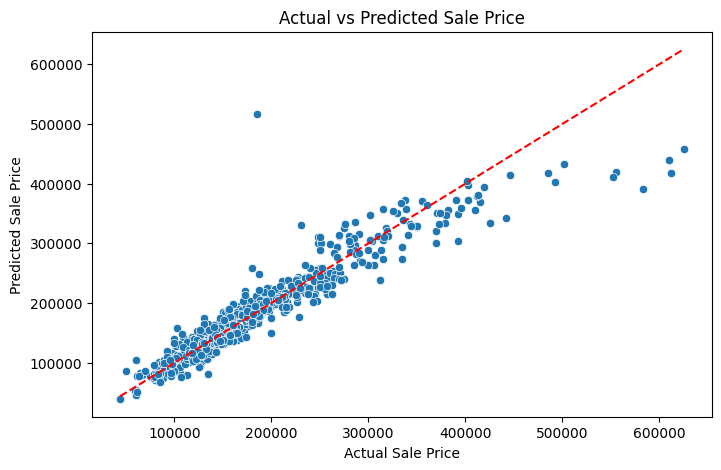

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()